In [20]:
# opt final
from gurobipy import *
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(32)

FDD = 8
num_user = 360
time_interval = 10
beam_dir = 10

# Initialize

Xposition = np.random.rand(num_user, 2)-0.5


X_id = np.zeros([num_user, beam_dir], dtype="bool")

for i in range(num_user):
    phi = np.arctan2(Xposition[i][1], Xposition[i][0]) + 2*np.pi
    X_id[i][int(phi // (2*np.pi / beam_dir)) % beam_dir] = 1  



# H_i = 1 - np.sqrt(Xposition[:, 0]**2 + Xposition[:, 1]**2)/((0.5**2+0.5**2)**0.5)
H_i = np.random.rand(num_user)
D = np.random.randint(low=1, high=10, size=num_user)

D_rec = 1.0 / D

In [21]:
# Create a new model
m = Model("beamforming")

# Create variables
X_it = {}
for i in range(num_user):
    for t in range(time_interval):
        X_it[i, t] = m.addVar(vtype=GRB.BINARY)


B_dt = {}
for p in range(beam_dir):
    for t in range(time_interval):
        B_dt[p, t] = m.addVar(vtype=GRB.BINARY)


# Integrate new variables
m.update()



# Set objective
m.setObjective((quicksum(X_it[i,t]*H_i[i]for i in range(num_user) for t in range(time_interval)))*D_rec[i], GRB.MAXIMIZE) 

for i in range(num_user):
    m.addConstr(quicksum(X_it[i,t] for t in range(time_interval)) <= D[i])

for t in range(time_interval):
    m.addConstr(quicksum(B_dt[d,t] for d in range(beam_dir)) <= 1)

for t in range(time_interval):
    m.addConstr(quicksum(X_it[i,t] for i in range(num_user)) <= FDD)


for i in range(num_user):
    for t in range(time_interval):
        m.addConstr(X_it[i,t]<=quicksum(X_id[i, p]*B_dt[p, t] for p in range(beam_dir)))

m.optimize()



print('Obj: %g' % m.objVal)

X = np.empty([num_user, time_interval])
for user in range(num_user):
    for t in range(time_interval):
        X[user, t]=X_it[user, t].X


B = np.empty([beam_dir, time_interval])
for i in range(beam_dir):
    for t in range(time_interval):
        B[i, t]=B_dt[i, t].X

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 3980 rows, 3700 columns and 14500 nonzeros
Model fingerprint: 0xac4827b5
Variable types: 0 continuous, 3700 integer (3700 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective -0.0000000
Presolve time: 0.09s
Presolved: 3980 rows, 3700 columns, 14500 nonzeros
Variable types: 0 continuous, 3700 integer (3700 binary)

Root relaxation: objective 9.128268e+00, 3545 iterations, 0.24 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    9.12827    0  111   -0.00000    9.12827      -     -    0s
H    0     0                       9.0308703    9.12827  1.08%     -    0s
H    0     0                       9.1001023    9.12827  0.31%     -    0s
H    0  

In [29]:
for d in range(beam_dir):
    print(d, B[d, :].sum())

0 3.0
1 2.0
2 0.0
3 0.0
4 0.0
5 2.0
6 0.0
7 1.0
8 1.0
9 1.0


In [22]:
for i in range(beam_dir):
    print(i, X_id[:, i].sum())
#     print(i, D_dt[i, :].sum())

for d in range(beam_dir):
    D_d = 0
    whos = np.argwhere(X_id[:, d]).reshape(-1)
    for i in whos:
        D_d += D[i]
    print(d, D_d)

0 38
1 41
2 42
3 32
4 22
5 35
6 44
7 31
8 42
9 33
0 194
1 204
2 199
3 148
4 101
5 153
6 198
7 160
8 244
9 159


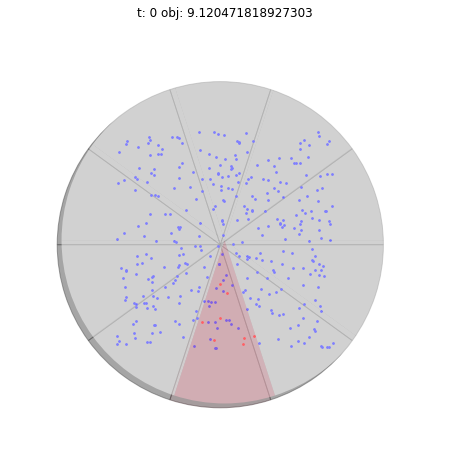

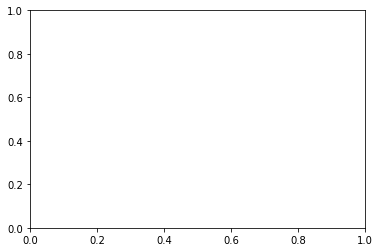

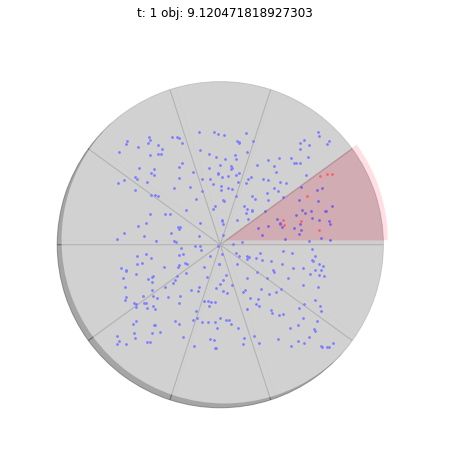

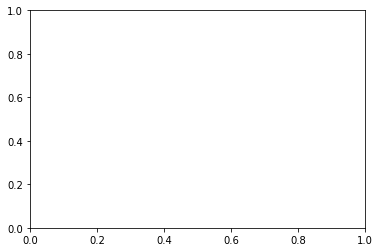

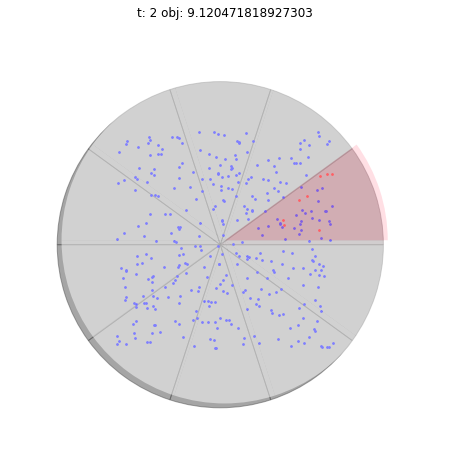

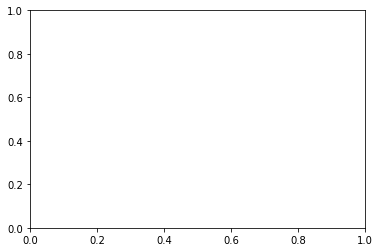

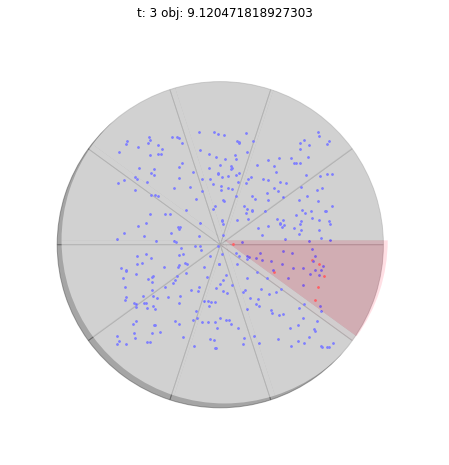

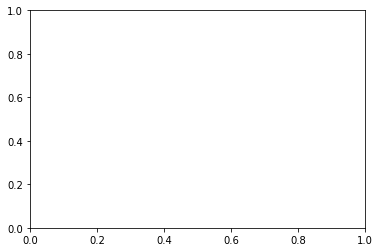

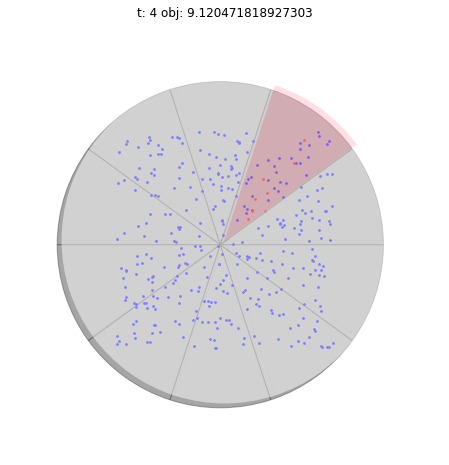

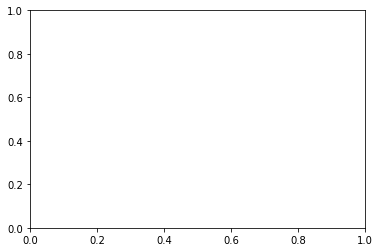

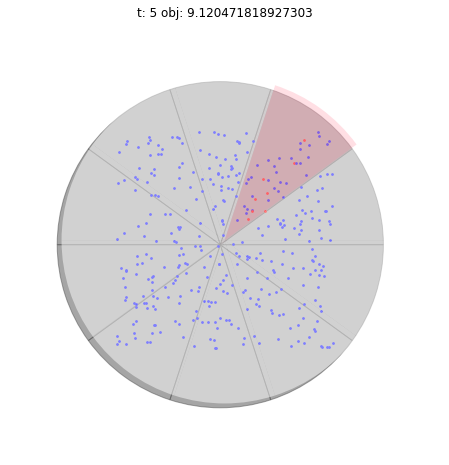

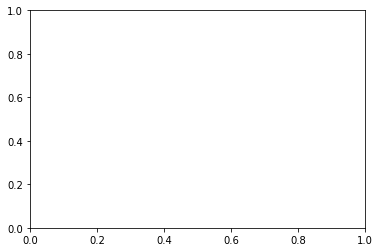

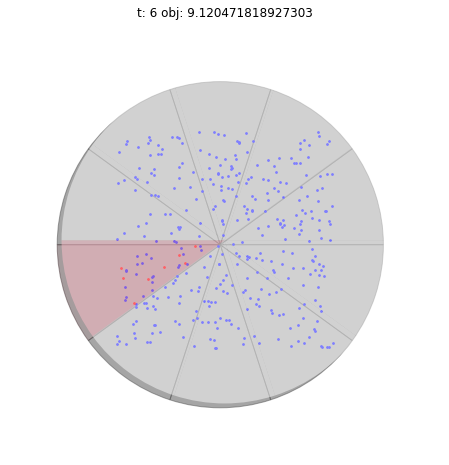

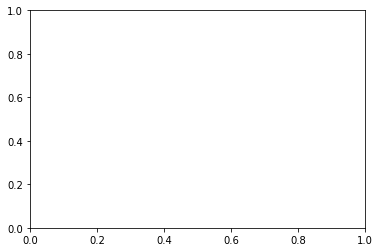

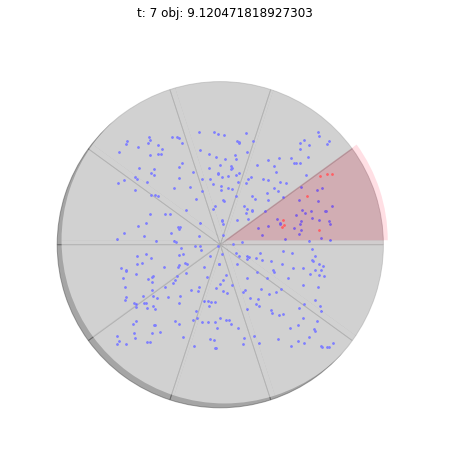

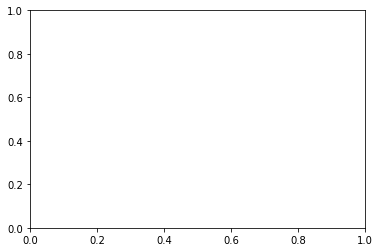

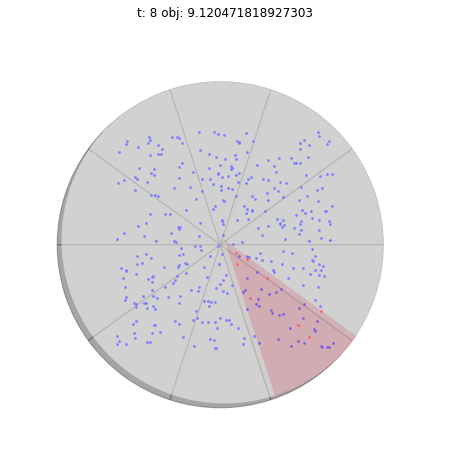

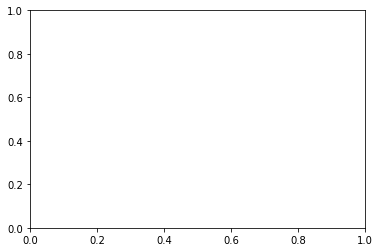

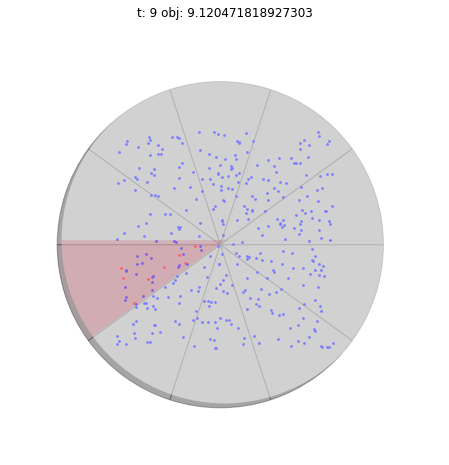

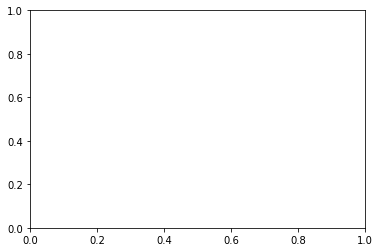

In [40]:
for t in range(time_interval):

    pie_values = [1] * beam_dir
    pie_colors = ['white'] * beam_dir
    for i in range(beam_dir):
        if B_dt[i, t].X == 1:
            pie_colors[i] = 'pink'


    plt.figure(figsize=(8, 8))    


        
    for i in range(user):
        if X[i, t] == 1:
            plt.scatter(Xposition[i, 0], Xposition[i, 1], c = 'r', s=3)
        else:
            plt.scatter(Xposition[i, 0], Xposition[i, 1], c = 'b', s=3)


        
    plt.pie(pie_values,colors=pie_colors, radius=0.75, shadow=True, center = (0, 0), wedgeprops={'alpha':0.5})
    plt.title("t: "+ str(t) + " obj: "+str(m.objVal))
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.savefig(str(t))
    plt.show()


In [34]:
X_get = np.zeros((num_user, time_interval))


for d in range(beam_dir):
    f = FDD
    for u in range(num_user):
        if X_id[u, d] == 1 and X_get[u, d] < D[i]:
            X_get[u, d] += 1
            f -=1
            if f == 0:
                break

obj = 0
for i in range(num_user):
    obj += X_get[i, d] * H_i[i] / D[i]
print(obj)

1.317456629246543


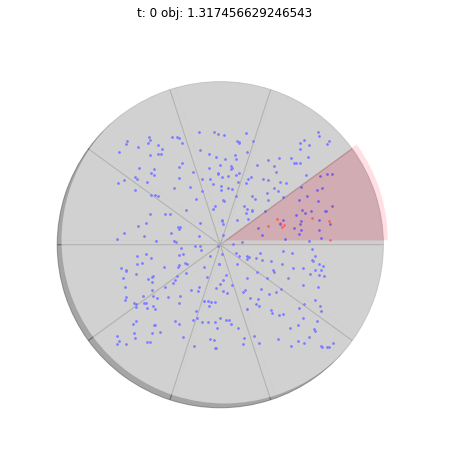

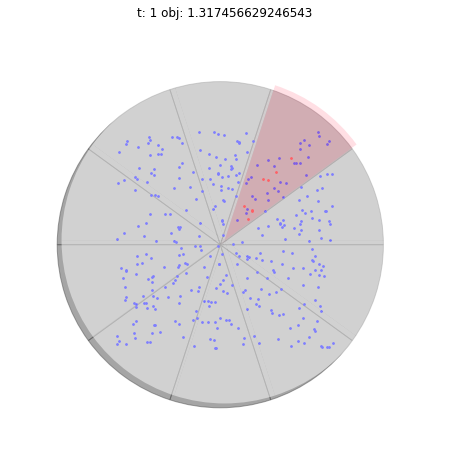

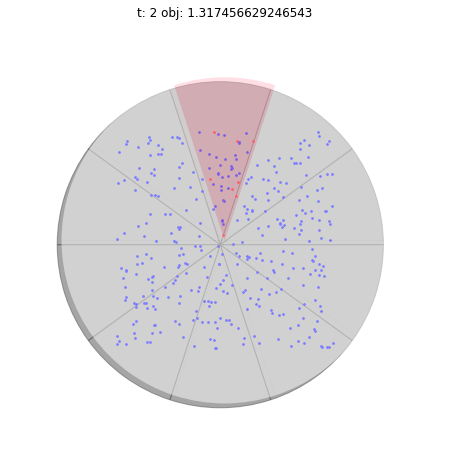

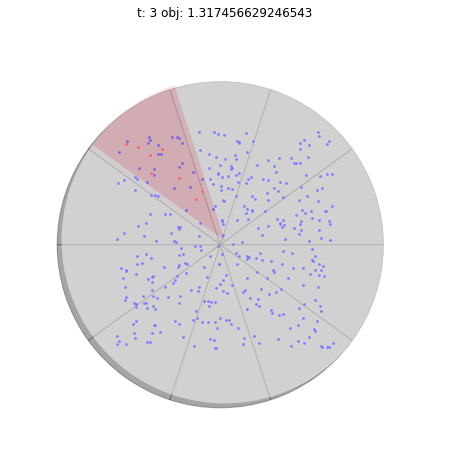

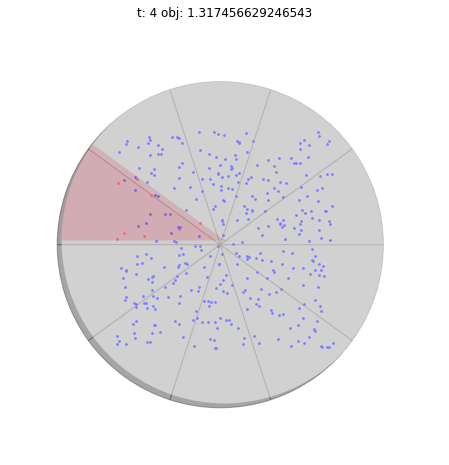

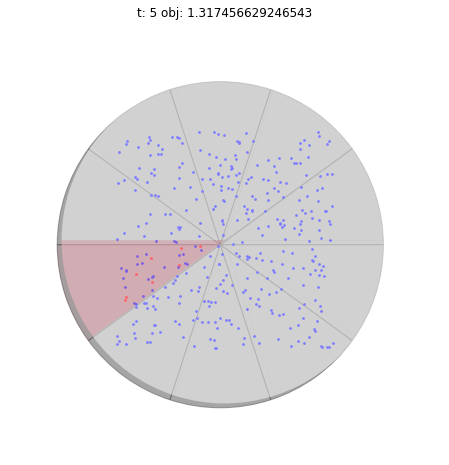

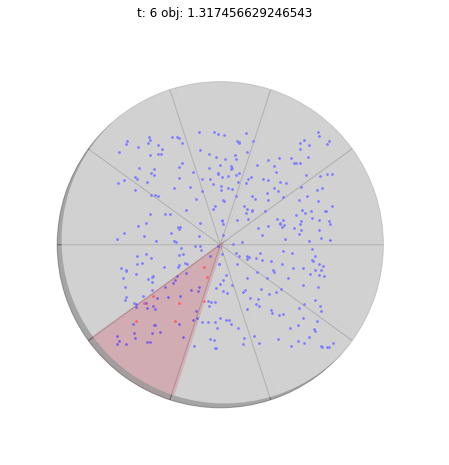

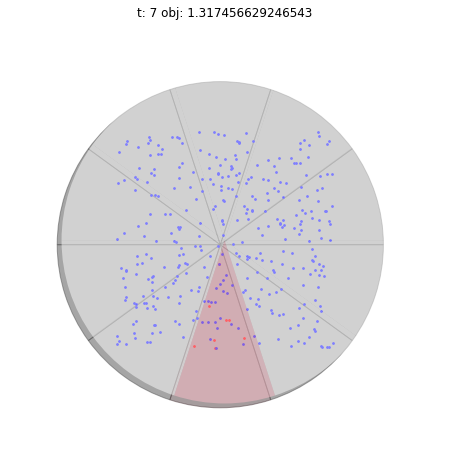

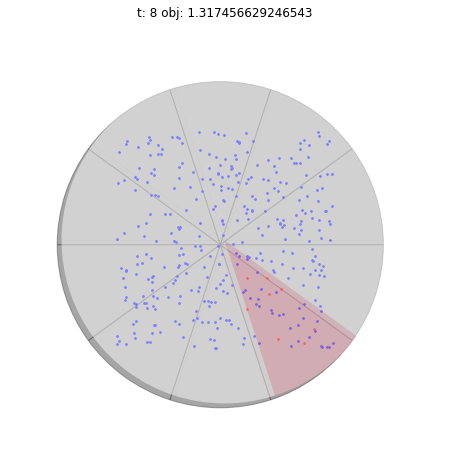

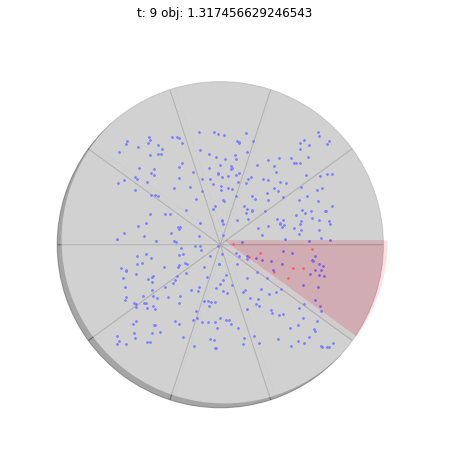

In [39]:
for t in range(time_interval):
#     plt.cla()    
    pie_values = [1] * beam_dir
    pie_colors = ['white'] * beam_dir
#     for i in range(beam_dir):
#         if B_dt[i, t].X == 1:
    pie_colors[t] = 'pink'


    plt.figure(figsize=(8, 8))    


        
    for i in range(user):
        if X_get[i, t] == 1:
            plt.scatter(Xposition[i, 0], Xposition[i, 1], c = 'r', s=3)
        else:
            plt.scatter(Xposition[i, 0], Xposition[i, 1], c = 'b', s=3)


        
    plt.pie(pie_values,colors=pie_colors, radius=0.75, shadow=True, center = (0, 0), wedgeprops={'alpha':0.5})
    plt.title("t: "+ str(t) + " obj: "+str(obj))
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.savefig("sweeping" + str(t))
    plt.show()
